#  Plan Adaptación
* Importar librerias
* Validar archivos y bases origen
* RSS
* Tweets
* Guardar en Data Base
## Validar cambios
* Probar librerias aprendidas

### instalacion en Español

Intalación
SentimentClassifier()  Español
pip install --upgrade scikit-learn==0.20.3  (instalar la versión 22 para python 3.8)
ERROR: Failed building wheel for scikit-learn


conda install -c anaconda scikit-learn

Antes descargar

 https://visualstudio.microsoft.com/visual-cpp-build-tools/


https://www.youtube.com/watch?v=kRVJFhFDuYA  minuto 11.40
* Seguir las instrucciones de los comentarios
* pip install spanish_sentiment_analysis
* Reiniciar Anaconda
* pip install -U scikit-learn scipy matplotlib  (no es segura que sea esto)

In [ ]:
 https://visualstudio.microsoft.com/visual-cpp-build-tools/

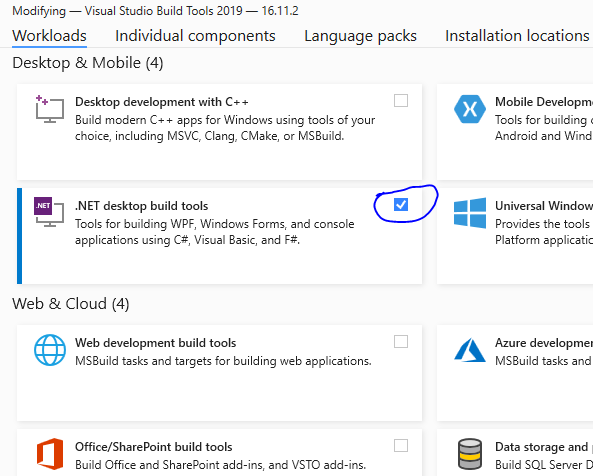

## Importar librerias

In [1]:
# Analisis de Sentimientos
##librerias ingles
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


#librerías Español
import joblib
#import sklearn.external.joblib as extjoblib
from  classifier import SentimentClassifier
#from classifier import *
clf = SentimentClassifier()

# importaciones Tokenizacion

import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
pst = PorterStemmer()
import string
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')
stopWEnglish = set(stopwords.words('english'))
stopWSP = set(stopwords.words('spanish'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\CristhianJohnatanIzq\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\ProgramData\Anaconda3\envs\T\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CristhianJohnatanIzq\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CristhianJohnatanIzq\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stop

In [2]:
# importacion de dependencias
import tweepy
import json, re
import pandas as pd

#RSS importaciones
import feedparser
from datetime import datetime
from time import mktime

# Manejo de Fechas
from datetime import datetime
from time import mktime
import time
import datetime
fechaHoy=datetime.datetime.now().date()
from datetime import *

In [3]:
import nltk
import pyLDAvis.gensim_models
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [4]:
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

### Definición Métodos

#### Funciones para limpieza

In [5]:
def limpiar_texto(texto):
    """
    Función para realizar la limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminamos comas y /
    texto = re.sub(r',', ' ', str(texto))
    texto = re.sub(r'/', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # remover \n
    #texto = re.sub(r'\n', '', texto)
    texto = texto.replace('\n', '')
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

In [6]:
def analisisSentimientosIngles(text):
    resultado = sid.polarity_scores(text)
    return resultado["compound"]

## enEspañol
def analisisSentimientosEspanol(text):
    resultado= clf.predict(text)
    resultado= resultado*2-1
    #resultado= resultado
    return resultado


def seleccionAnalisis(fila):
    if fila["lang"] == "eng" :
        return analisisSentimientosIngles(str(fila["full_text"]))
    elif fila["lang"] == "esp" :
        return analisisSentimientosEspanol(str(fila["full_text"]))

#tokenizacion
def tokenizcionIngles(text):
    textPunt = text.translate(str.maketrans('','',string.punctuation))
    textPunt = textPunt.translate(str.maketrans('','','1234567890'))
    textPunt = textPunt.translate(str.maketrans('','','’'))
    textPunt = textPunt.translate(str.maketrans('','',"''"))
    textPunt = textPunt.translate(str.maketrans('','','✅'))
    textMin = word_tokenize(textPunt.lower())
    textSW = [x for x in textMin if x not in stopWEnglish]
    tokenStm = [None] * len(textSW)
    for i in range(0, len(textSW)):
        tokenStm[i]=pst.stem(textSW[i])
    fdist = FreqDist(tokenStm)
    return pd.DataFrame(fdist.items(), columns=['word', 'frec'])

def tokenizcionEspanol(text):
    textPunt = text.translate(str.maketrans('','',string.punctuation))
    textPunt = textPunt.translate(str.maketrans('','','1234567890'))
    textPunt = textPunt.translate(str.maketrans('','','’'))
    textPunt = textPunt.translate(str.maketrans('','',"'"))
    textPunt = textPunt.translate(str.maketrans('','','✅'))
    textMin = word_tokenize(textPunt.lower())
    textSW = [x for x in textMin if x not in stopWSP]
    stemmed_text = [stemmer.stem(i) for i in textSW]
    fdist = FreqDist(stemmed_text)
    return pd.DataFrame(fdist.items(), columns=['word', 'frec'])

def seleccionTokenizacion(fila,var):
    if fila["lang"] == "eng" :
        return tokenizcionIngles(str(fila[var]))
    elif fila["lang"] == "esp" :
        return tokenizcionEspanol(str(fila[var]))


#RSS definicion de métodos
def parse(url):
    return feedparser.parse(url)

def get_source(parsed):
    feed= parsed['feed']
    return {
        'link': feed['link'],
        'title': feed['title'],
        'subtitle': feed['subtitle']
    }

def get_articles(parsed):
        articles = []
        entries= parsed['entries']
        for entry in entries:
            articles.append({
                'id': entry['id'],
                'link': entry['link'],
                'title': entry['title'],
                'summary':entry['summary'],
                'published': entry['published_parsed']                
            })
        return articles
    
def get_articles_resultado(parsed,fuenteRSS):
        articles = []
        entries= parsed['entries']
        for entry in entries:
            #partDate =entry['published_parsed'].replace('(','')replace(')','').split(",")
            #almacenarFuente            
            # validacion si falta una dato            
            if 'summary' not in entry :
                entry['summary']=""
            if 'title' not in entry :
                entry['title']=""    
            articles.append({
                'fuenteRss':fuenteRSS,
                'idP': entry['id'],                
                'texto': entry['title']+". "+entry['summary'],
                'published': entry['published_parsed']                
            })
        return articles
    
def getFechaFromRss(fechaStruct):
    #print (fechaStruct)
    if fechaStruct is None:
        #print ("entro")
        return datetime.now()
    else:
        return datetime.fromtimestamp(mktime(fechaStruct))

###  Tweeter

In [7]:
###TWEETER
# autenticación
# keys and tokens from the Twitter Dev Console 
consumer_key = '5BOcNnQsuIxDTBejlZ75xBqZ0'
consumer_secret = 'c6Cnx7SItN5Gda6K8hgtPo3tPyI18TU9eUh28jx3d4lDceewiG'
access_token = '927023579727884288-1jTaXF5wmUbX2NeYzUcSlmzXQMca4kU'
access_token_secret = 'Y62wUwgoWjfHGw5S0jlYH7w8ulmlRzaFcxbGjBP0wLin9'

#creación del objeto para extraer información
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#obtejo
api= tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
# si llega al cupo espera y continua

pd.set_option("display.max_colwidth", 100)
df=pd.read_csv("AmigosTweetter_base.csv", sep=';',encoding = "ISO-8859-1", engine='python', index_col="id")

#Cargar Tweets
tweets = []
fechaDelTweetAnterior=fechaHoy
    
for index, row in df.iterrows():
    #for amigo in df:
    i=0
    tweetsAmigo=tweepy.Cursor(api.user_timeline, screen_name=row['screen_name'], tweet_mode="extended").items(row['NoTweets'])
    for tweet in tweetsAmigo:
        tweets.append({
            'id':tweet.id,
            'full_text':tweet.full_text,
            'created_at':tweet.created_at,
            'lang':row['Idioma'],
            'id_fuente':row['screen_name']
        })
        i=i+1            
    print(str(i)+" "+row['screen_name'])

200 bbcmundo
400 BluRadioCo
450 elespectador
350 RevistaSemana
200 ELTIEMPO
80 elcolombiano
250 lafm
250 NoticiasRCN
200 rcnradio
200 MailOnline
250 clarincom
180 NBCNews
200 rcnmundo
250 CaracolRadio
200 NoticiasCaracol
100 RevistaDinero
100 NTN24
50 NASA
100 PublimetroCol


###  Validar Análisis sentimientos

### prueba algoritmo sqdm

In [13]:
#sentiment = sentiment_analysis.SentimentAnalysisSpanish()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [19]:
tweetsDF=pd.DataFrame(tweets)

In [20]:
pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 500)
tweetsDF

,id,full_text,created_at,lang,id_fuente
0,1437201114328358914,"Durante la Segunda Guerra Mundial, los nazis utilizaron el gas en dosis concentradas para matar a millones de judíos\nhttps://t.co/d39Z3syLwC",2021-09-12 23:47:02,esp,bbcmundo
1,1437199366075334660,El sorprendente hallazgo que cambia el significado de una obra maestra de Vermeer \n\nhttps://t.co/zD2tdQFazF,2021-09-12 23:40:05,esp,bbcmundo
2,1437197352444567563,6 ejercicios que hace cada día la neurocientífica Wendy Suzuki para mejorar su fortaleza mental https://t.co/jQ6Bbo4N5P,2021-09-12 23:32:05,esp,bbcmundo
3,1437190051155353602,Hay casos en los que los maridos vacían sus bienes para que sus esposas no tengan acceso a las cantidades a las que tienen derecho\nhttps://t.co/t7idYBK0EC,2021-09-12 23:03:04,esp,bbcmundo
4,1437189578696298496,7 cosas que podían hacer las princesas medievales y que quizás no sabías https://t.co/oSLb7pMAin,2021-09-12 23:01:11,esp,bbcmundo
...,...,...,...,...,...
4005,1436762198228017162,Un herido y tres capturados en una balacera este sábado en Cali https://t.co/8MKdGzS9L6 https://t.co/uBVaSTCyOm,2021-09-11 18:42:56,esp,PublimetroCol
4006,1436761437444182025,Impresionante video: un jeep se volteó y dejó 21 personas heridas https://t.co/Fuv3NJ0j6o https://t.co/UmjA0cgvnx,2021-09-11 18:39:55,esp,PublimetroCol
4007,1436758064342966272,Valle del Cauca priorizará segundas dosis mientras se supera escasez https://t.co/Tw0zwAnZeg https://t.co/TMXZpq1GiU,2021-09-11 18:26:30,esp,PublimetroCol
4008,1436754760372297731,Policías señalados por asesinatos de hace un año en Bogotá no han sido separados de sus cargos https://t.co/NUHJrJcDwP,2021-09-11 18:13:23,esp,PublimetroCol


In [21]:
tweetsDFProcesado=tweetsDF.copy()

In [22]:
### limpiar texto
tweetsDFProcesado["full_text_Limpio"]=tweetsDFProcesado.full_text.apply(limpiar_texto)

In [23]:
tweetsDFProcesado

,id,full_text,created_at,lang,id_fuente,full_text_Limpio
0,1437201114328358914,"Durante la Segunda Guerra Mundial, los nazis utilizaron el gas en dosis concentradas para matar a millones de judíos\nhttps://t.co/d39Z3syLwC",2021-09-12 23:47:02,esp,bbcmundo,durante la segunda guerra mundial los nazis utilizaron el gas en dosis concentradas para matar millones de judíos https co d39z3sylwc
1,1437199366075334660,El sorprendente hallazgo que cambia el significado de una obra maestra de Vermeer \n\nhttps://t.co/zD2tdQFazF,2021-09-12 23:40:05,esp,bbcmundo,el sorprendente hallazgo que cambia el significado de una obra maestra de vermeer https co zd2tdqfazf
2,1437197352444567563,6 ejercicios que hace cada día la neurocientífica Wendy Suzuki para mejorar su fortaleza mental https://t.co/jQ6Bbo4N5P,2021-09-12 23:32:05,esp,bbcmundo,6 ejercicios que hace cada día la neurocientífica wendy suzuki para mejorar su fortaleza mental https co jq6bbo4n5p
3,1437190051155353602,Hay casos en los que los maridos vacían sus bienes para que sus esposas no tengan acceso a las cantidades a las que tienen derecho\nhttps://t.co/t7idYBK0EC,2021-09-12 23:03:04,esp,bbcmundo,hay casos en los que los maridos vacían sus bienes para que sus esposas no tengan acceso las cantidades las que tienen derecho https co t7idybk0ec
4,1437189578696298496,7 cosas que podían hacer las princesas medievales y que quizás no sabías https://t.co/oSLb7pMAin,2021-09-12 23:01:11,esp,bbcmundo,7 cosas que podían hacer las princesas medievales que quizás no sabías https co oslb7pmain
...,...,...,...,...,...,...
4005,1436762198228017162,Un herido y tres capturados en una balacera este sábado en Cali https://t.co/8MKdGzS9L6 https://t.co/uBVaSTCyOm,2021-09-11 18:42:56,esp,PublimetroCol,un herido tres capturados en una balacera este sábado en cali https co 8mkdgzs9l6 https co ubvastcyom
4006,1436761437444182025,Impresionante video: un jeep se volteó y dejó 21 personas heridas https://t.co/Fuv3NJ0j6o https://t.co/UmjA0cgvnx,2021-09-11 18:39:55,esp,PublimetroCol,impresionante video un jeep se volteó dejó 21 personas heridas https co fuv3nj0j6o https co umja0cgvnx
4007,1436758064342966272,Valle del Cauca priorizará segundas dosis mientras se supera escasez https://t.co/Tw0zwAnZeg https://t.co/TMXZpq1GiU,2021-09-11 18:26:30,esp,PublimetroCol,valle del cauca priorizará segundas dosis mientras se supera escasez https co tw0zwanzeg https co tmxzpq1giu
4008,1436754760372297731,Policías señalados por asesinatos de hace un año en Bogotá no han sido separados de sus cargos https://t.co/NUHJrJcDwP,2021-09-11 18:13:23,esp,PublimetroCol,policías señalados por asesinatos de hace un año en bogotá no han sido separados de sus cargos https co nuhjrjcdwp


In [24]:
 tweetsDFProcesado['SentSQDM']=tweetsDFProcesado.full_text_Limpio.apply(sentiment.sentiment)*2-1

In [25]:
tweetsDFProcesado

,id,full_text,created_at,lang,id_fuente,full_text_Limpio,SentSQDM
0,1437201114328358914,"Durante la Segunda Guerra Mundial, los nazis utilizaron el gas en dosis concentradas para matar a millones de judíos\nhttps://t.co/d39Z3syLwC",2021-09-12 23:47:02,esp,bbcmundo,durante la segunda guerra mundial los nazis utilizaron el gas en dosis concentradas para matar millones de judíos https co d39z3sylwc,-0.751994
1,1437199366075334660,El sorprendente hallazgo que cambia el significado de una obra maestra de Vermeer \n\nhttps://t.co/zD2tdQFazF,2021-09-12 23:40:05,esp,bbcmundo,el sorprendente hallazgo que cambia el significado de una obra maestra de vermeer https co zd2tdqfazf,-0.604157
2,1437197352444567563,6 ejercicios que hace cada día la neurocientífica Wendy Suzuki para mejorar su fortaleza mental https://t.co/jQ6Bbo4N5P,2021-09-12 23:32:05,esp,bbcmundo,6 ejercicios que hace cada día la neurocientífica wendy suzuki para mejorar su fortaleza mental https co jq6bbo4n5p,-0.954070
3,1437190051155353602,Hay casos en los que los maridos vacían sus bienes para que sus esposas no tengan acceso a las cantidades a las que tienen derecho\nhttps://t.co/t7idYBK0EC,2021-09-12 23:03:04,esp,bbcmundo,hay casos en los que los maridos vacían sus bienes para que sus esposas no tengan acceso las cantidades las que tienen derecho https co t7idybk0ec,-0.999832
4,1437189578696298496,7 cosas que podían hacer las princesas medievales y que quizás no sabías https://t.co/oSLb7pMAin,2021-09-12 23:01:11,esp,bbcmundo,7 cosas que podían hacer las princesas medievales que quizás no sabías https co oslb7pmain,-0.996998
...,...,...,...,...,...,...,...
4005,1436762198228017162,Un herido y tres capturados en una balacera este sábado en Cali https://t.co/8MKdGzS9L6 https://t.co/uBVaSTCyOm,2021-09-11 18:42:56,esp,PublimetroCol,un herido tres capturados en una balacera este sábado en cali https co 8mkdgzs9l6 https co ubvastcyom,-0.773088
4006,1436761437444182025,Impresionante video: un jeep se volteó y dejó 21 personas heridas https://t.co/Fuv3NJ0j6o https://t.co/UmjA0cgvnx,2021-09-11 18:39:55,esp,PublimetroCol,impresionante video un jeep se volteó dejó 21 personas heridas https co fuv3nj0j6o https co umja0cgvnx,-0.541247
4007,1436758064342966272,Valle del Cauca priorizará segundas dosis mientras se supera escasez https://t.co/Tw0zwAnZeg https://t.co/TMXZpq1GiU,2021-09-11 18:26:30,esp,PublimetroCol,valle del cauca priorizará segundas dosis mientras se supera escasez https co tw0zwanzeg https co tmxzpq1giu,-0.508633
4008,1436754760372297731,Policías señalados por asesinatos de hace un año en Bogotá no han sido separados de sus cargos https://t.co/NUHJrJcDwP,2021-09-11 18:13:23,esp,PublimetroCol,policías señalados por asesinatos de hace un año en bogotá no han sido separados de sus cargos https co nuhjrjcdwp,-0.998634


In [26]:
 tweetsDFProcesado['SentTesis']=tweetsDFProcesado.full_text_Limpio.apply(analisisSentimientosEspanol)

### Analisis de fuentes

In [27]:
pd.set_option('display.max_rows', None)

In [29]:
tweetsDFProcesado[tweetsDFProcesado['id_fuente']=='bbcmundo']

,id,full_text,created_at,lang,id_fuente,full_text_Limpio,SentSQDM,SentTesis
0,1437201114328358914,"Durante la Segunda Guerra Mundial, los nazis utilizaron el gas en dosis concentradas para matar a millones de judíos\nhttps://t.co/d39Z3syLwC",2021-09-12 23:47:02,esp,bbcmundo,durante la segunda guerra mundial los nazis utilizaron el gas en dosis concentradas para matar millones de judíos https co d39z3sylwc,-0.751994,-0.516320
1,1437199366075334660,El sorprendente hallazgo que cambia el significado de una obra maestra de Vermeer \n\nhttps://t.co/zD2tdQFazF,2021-09-12 23:40:05,esp,bbcmundo,el sorprendente hallazgo que cambia el significado de una obra maestra de vermeer https co zd2tdqfazf,-0.604157,0.693239
2,1437197352444567563,6 ejercicios que hace cada día la neurocientífica Wendy Suzuki para mejorar su fortaleza mental https://t.co/jQ6Bbo4N5P,2021-09-12 23:32:05,esp,bbcmundo,6 ejercicios que hace cada día la neurocientífica wendy suzuki para mejorar su fortaleza mental https co jq6bbo4n5p,-0.954070,-0.839858
3,1437190051155353602,Hay casos en los que los maridos vacían sus bienes para que sus esposas no tengan acceso a las cantidades a las que tienen derecho\nhttps://t.co/t7idYBK0EC,2021-09-12 23:03:04,esp,bbcmundo,hay casos en los que los maridos vacían sus bienes para que sus esposas no tengan acceso las cantidades las que tienen derecho https co t7idybk0ec,-0.999832,-0.775862
4,1437189578696298496,7 cosas que podían hacer las princesas medievales y que quizás no sabías https://t.co/oSLb7pMAin,2021-09-12 23:01:11,esp,bbcmundo,7 cosas que podían hacer las princesas medievales que quizás no sabías https co oslb7pmain,-0.996998,-0.391173
5,1437189305265496070,"En un fallo considerado histórico para el país, el organismo declaró que es inconstitucional criminalizar el aborto de manera absoluta por parte de mujeres y personas gestantes\nhttps://t.co/laGQJ1PiEU",2021-09-12 23:00:06,esp,bbcmundo,en un fallo considerado histórico para el país el organismo declaró que es inconstitucional criminalizar el aborto de manera absoluta por parte de mujeres personas gestantes https co lagqj1pieu,-0.987971,-0.505713
6,1437189063430316034,"Además de segregar las universidades por género, los talibanes anunciaron que se introducirá un nuevo código de vestimenta para las mujeres y que las materias que ellas podrán estudiar serán revisadas. https://t.co/t23FmLBZKR",2021-09-12 22:59:09,esp,bbcmundo,además de segregar las universidades por género los talibanes anunciaron que se introducirá un nuevo código de vestimenta para las mujeres que las materias que ellas podrán estudiar serán revisadas https co t23fmlbzkr,-0.999856,-0.966289
7,1437188794655117315,"¿Sabes qué es un evento de ""cisne negro""? Y no, no es una aparición del ave... \n\nhttps://t.co/s5UnIgY4st",2021-09-12 22:58:04,esp,bbcmundo,sabes qué es un evento de cisne negro no no es una aparición del ave https co s5unigy4st,-0.985885,-0.650523
8,1437188030671032324,"Las fotografías de un nuevo centro de distribución construido por el gigante tecnológico Amazon en Tijuana, México, cerca de la frontera con EE.UU., se viralizaron en pocas horas a través de las redes sociales.\nhttps://t.co/sVGNNihRC0",2021-09-12 22:55:02,esp,bbcmundo,las fotografías de un nuevo centro de distribución construido por el gigante tecnológico amazon en tijuana méxico cerca de la frontera con ee uu se viralizaron en pocas horas través de las redes sociales https co svgnnihrc0,0.986721,0.365639
9,1437187025963294722,"Hans llevaba trabajando más de un año en las Torres Gemelas cuando los aviones chocaron y derrumbaron los edificios. Compartió con BBC Mundo su experiencia el 11-S, sus reflexiones 20 años después y las cosas que todavía conserva de la época. \n\nhttps://t.co/EbCvxKWrDu",2021-09-12 22:51:03,esp,bbcmundo,hans llevaba trabajando más de un año en las torres gemelas cuando los aviones chocaron derrumbaron los edificios compartió con bbc mundo su experiencia el 11 sus reflexiones 20 años después las cosas 

In [34]:
print(sentiment.sentiment("durante las próximas dos décadas estados unidos vivirá lo que se considera como la mayor transferencia de riqueza de la historia entre generaciones"))

3.5527645786688814e-05


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
print(sentiment.sentiment("durante las próximas dos décadas estados unidos"))

0.3022032586537717


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
print(sentiment.sentiment("la mayor transferencia de riqueza de la historia entre generaciones"))

0.008626343804399068


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
print(sentiment.sentiment("matemático colombiano entre los mejores del mundo tras ganar destacado premio internacional vocesysonidos"))

0.3024281625697109


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
print(sentiment.sentiment("ganar")*2-1)

NameError: name 'sentiment' is not defined

### fin algoritmo sqdm

###  prueba algoritmo anterior

In [13]:
analisisSentimientosEspanol("matemático colombiano entre los mejores del mundo tras ganar destacado premio internacional vocesysonidos")

0.3862731086459561

In [14]:
analisisSentimientosEspanol("tras")

-0.3799038769427223

### fin algoritmo anterior

###  Fin validación Texto

In [10]:
tweetsDF=pd.DataFrame(tweets)
tweetsDF["polaridad"]=tweetsDF.apply(seleccionAnalisis, axis=1)

# TOKENIZAR TWEETS
tokenTweetsFinal=pd.DataFrame(columns =['word','frec','lang','id','created_at','id_fuente'])  
tokenTweetsFinal

### tokenizacion
for index, row in tweetsDF.iterrows():
    #print(row)
    tokenTweetsDF=seleccionTokenizacion(row,"full_text")
    tokenTweetsDF['lang']=row['lang']
    tokenTweetsDF['id']=row['id']
    tokenTweetsDF['created_at']=row['created_at']
    tokenTweetsDF['id_fuente']=row['id_fuente']
    tokenTweetsFinal=tokenTweetsFinal.append(tokenTweetsDF, ignore_index = True)
    #print(tokenTweetsDF)
    
tokenTweetsFinal.sort_values(by=['frec'], ascending=False)    
tweetsDF.pop("full_text")

NameError: name 'clf' is not defined

## RSS

In [ ]:
#RSS
df=pd.read_csv("FuentesRss.csv", sep=';',encoding = "ISO-8859-1", engine='python', index_col="id")
#eliminar descartados
df=df[df.DescxErrores != 1]
df

tokenTweetsFinalRSS=pd.DataFrame(columns =['word','frec','lang','id','created_at','id_fuente'])  
tokenTweetsFinalRSS

#procesamiento de RSS
dicResultado=[]
dataFrameResultado = pd.DataFrame() 
bandera=0

for index, row in df.iterrows(): 
    fuenteRss= row["FuentesRSS"]
    idioma=row["lenguaje"]
    topico=row["concepto estandar"]
    pais=row["Pais"]
    
    #depurar antes de procesar
    print ("procesando fuente numero: "+str(index))
    print ( "fuenteRss:"+fuenteRss+" idioma:"+idioma+ " topico:"+pais )   
    
    auxParse=parse(fuenteRss)
    articles1=get_articles_resultado(auxParse,fuenteRss)
    #articles1    
    #convertir a dataframe
    articles2=pd.DataFrame(articles1)
    #implementacion fechas a articulos
    articles2
    #depurar fecha recibida
    #print (articles2["published"])
    articles2["date"]=articles2["published"].apply(getFechaFromRss)
    articles2["lang"]=idioma
    if idioma == "eng" :
        articles2["polaridad"]=articles2["texto"].apply(analisisSentimientosIngles) 
    elif idioma == "esp" :
        articles2["polaridad"]=articles2["texto"].apply(analisisSentimientosEspanol)
    dicResultado.append(articles2)
    
dataFrameResultado=pd.concat(dicResultado)

#tokenizacion RSS
tokenRSSFinal=pd.DataFrame(columns =['word','frec','lang','idP','date','fuenteRss'])  
tokenRSSFinal
### tokenizacion
for index, row in dataFrameResultado.iterrows():
    #print(row)
    tokenRSSDF=seleccionTokenizacion(row,"texto")
    tokenRSSDF['lang']=row['lang']
    tokenRSSDF['idP']=row['idP']
    tokenRSSDF['date']=row['date']
    tokenRSSDF['fuenteRss']=row['fuenteRss']
    tokenRSSFinal=tokenRSSFinal.append(tokenRSSDF, ignore_index = True)


#ajustar archivo
dataFrameResultado=pd.concat(dicResultado)
dataFrameResultado.pop("texto")
dataFrameResultado.pop("published")

###  Guardado en Base de Datos

In [ ]:
## guardado en base de Datos
#guardar en Bodega de Datos
import pyodbc
from flask_sqlalchemy import SQLAlchemy
from urllib import parse
from flask import Flask, render_template, request, url_for, redirect
#app = Flask(__name__)
#db = SQLAlchemy(app)
#engine_options = app.config['SQLALCHEMY_ENGINE_OPTIONS']

app = Flask(__name__)
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
db = SQLAlchemy(app)
engine_options = app.config['SQLALCHEMY_ENGINE_OPTIONS']
params = parse.quote_plus("DRIVER={SQL Server};SERVER=SRV-SSISDB;DATABASE=STAGINGAREA;Trusted_Connection=yes;")
url = "mssql+pyodbc:///?odbc_connect=%s" % params
engine = db.create_engine(url, engine_options)
##guardarTablaFinales
tweetsDF.to_sql('T_Tweetes_TMP',con=engine,if_exists='append', index=False)
dataFrameResultado.to_sql('T_RSS_TMP',con=engine,if_exists='append', index=False)

print("fin del proceso")
#connDWH.close()